<a href="https://colab.research.google.com/github/MarChvez45/Segunda-PreEntrega-PFinal/blob/main/Segunda_pre_entrega_proyecto_final_Chavez%2BOrtiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Link de presentación:** 
https://docs.google.com/presentation/d/1-FF3EJY2ax8hiVTDvcDYiJSlL1GZCqOkLwCGjN__fL4/edit#slide=id.p

## ¿Que factores influyen para dejar el puesto de trabajo?

El mayor activo que tiene una compañía es su equipo humano, especialmente aquél que demuestra tener un valor añadido, un talento especial que le hace importante para la consecución de los objetivos de la empresa. Por todo ello, identificar el talento, reclutarlo y saber retenerlo son cuestiones básicas -aunque no sencillas de llevar a cabo- para cualquier departamento de recursos humanos.

Cuando se pierde talento, la empresa también está perdiendo en capacidad para lograr sus objetivos. De ahí que cada vez resulte más importante aplicar las medidas necesarias para lograr que los trabajadores más talentosos quieran permanecer por mucho más tiempo en la compañía.

**El objetivo del análisis es determinar cuales son esas variables que nos permiten detectar el posible agotamiento de un empleado y su consecuente perdida.** 


***Contexto Analitico***
El área de recursos humanos ha proporcionado una base de datos con los últimos registros de 1,470 empleados entre los que podemos analizar el comportamiento de distintos factores que pueden relacionarse con el estado de abandono (variable categórica). 

***Preguntas/Hipotesis a resolver***

---

*   ¿La edad de los empleados influye en el abandono?
*   ¿Los empleados con menores salarios, tienen una mayor tendencia a abandonar?
*   ¿Que impacto tienen los años dentro de la compañia en la decisión de abandonar por parte de los empleados?
*   ¿Hay algún area que tenga mas abandonos en relacion a otras?
*   ¿Hay una probabilidad mas alta en abandono en empleados que no tienen un nivel alto de satisfacción laboral?
*   ¿Es más fácil que los empleados solteros, decidan a abandonar el trabajo a diferencia del resto de empleados con otro tipo de status marital?





In [2]:
#Importamos librerias
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)
import io
from google.colab import files

mpl.style.use('bmh')

In [3]:
import pandas as pd

#Cargamos y definimos el dataset
df = pd.read_csv ('https://raw.githubusercontent.com/cryptotincho/HR/main/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Analizamos el data frame mostrando campos y tipos de datos de cada uno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Dimensionamos el tamaño de la base
print(df.shape)

(1470, 35)


In [13]:
#Verificamos valores nulos
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Borramos duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
col_borrar=['EmployeeNumber','EmployeeCount', 'StandardHours','Over18'] 
#Definimos las columnas a borrar porque no aportan.
#'EmployeeNumber': Es como el ID de cada empleado.
#'EmployeeCount': Todos arrojan como resultado el valor '1'.
#'StandardHours': Referente a las horas de trabajo estandar donde todos los registros tienen el mismo valor de 80.
#'Over18': Todos son mayores de 18 años.
df_d=df.drop(labels=col_borrar, axis=1)#Borramos las columnas seleccionadas

In [10]:
#Dimensionamos
print(df_d.shape)

(1470, 31)


### Colocaremos el detalle de los atributos de la base para una fácil indentificación de información.

**Age:** Edad del empleado. Variable numérica.

**Attrition:** Define si el empleado avandonó o no el empleo. Variable categórica.

**BusinessTravel:** Frecuencia de viajes por trabajo. Variable categórica.

**DailyRate:** Salario diario del empleado. Variable numérica.

**Department:** Departamento o área laboral. Variable categórica.

**DistanceFromHome:** Distancia que recorre el empleado para llegar a la oficina en kilómetros. Variable numérica.

**Education:** Cualificación del empledo. Variable categórica-numérica.

**EducationField:** Campo de educación del empleado. Variable categórica.

**EnvironmentSatisfaction:** Nivel de satisfacción con el entorno. Variable categórica-numérica.

**Gender:** Género del empleado. Variable categórica.

**HourlyRate:** Salario por hora del empleado. Variable numérica.

**JobInvolvement:** Nivel de participación laboral del empleado. Variable categórica-numérica.

**JobLevel:** Nivel de trabajo.Variable categórica-numérica.

**JobRole:** Rol de trabajo. Variable categórica.

**JobSatisfaction:** Nivel de satisfacción en el trabajo. Variable categórica-numérica.

**MaritalStatus:** Estatus marital del empleado. Variable categórica.

**MonthlyIncome:** Salario por mes del empleado. Variable numérica.

**MonthlyRate:** Tasa de ingreso mensual. Variable numérica.

**NumCompaniesWorked:** Número de empresas en las que trabajó el epleado anteriormente. Variable numérica.

**OverTime:** tiempo de trabajo extra que se labora. Variable categórica.

**PercentSalaryHike:** Porcentaje de aumento salarial. Variable numérica.

**PerformanceRating:** Tasa de rendimiento. Variable categórica-numérica.

**RelationshipSatisfaction:** Nivel de satisfacción en la relación laboral. Variable categórica-numérica.

**StockOptionLevel:** Nivel de opciones sobre acciones de la empresa. Variable categórica-numérica.

**TotalWorkingYears:** Años totales de trabajo del emplado. Variable numperica.

**TrainingTimesLastYear:** Tiempo de entrenamiento del trabajador en años. Variable numérica.

**WorkLifeBalance:** Equilibrio ttrabajo - vida. Variable categórica-numérica.

**YearsAtCompany:** Años trabajando en la compañía actual. Variable numérica.

**YearsInCurrentRole:** Total de años en el puesto actual. Variable numérica.

**YearsSinceLastPromotion:** Años desde la última promoción. Variable numérica.

**YearsWithCurrManager:** Años trabajando bajo el gerente actual. Variable numérica.

### Diccionario de variables categoricas:

Education

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'

EnvironmentSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

JobInvolvement

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

JobSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

PerformanceRating

1 'Low'

2 'Good'

3 'Excellent'

4 'Outstanding'

RelationshipSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

WorkLifeBalance

1 'Bad'

2 'Good'

3 'Better'

4 'Best'


In [11]:
#Realizamos un analisis con medidas descriptivas de los datos
df_d.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
#Analizamos la variable "Deserción"
df_d['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
#Creeamos un nuevo df solo con las filas en las cuales la viariable "Attrition" = "Yes"
abandono = df_d[df_d['Attrition'] == "Yes"]
noabandono = df_d[df_d['Attrition'] == "No"]


In [17]:
#Contamos el número de empleados en cada estado
print('Total de empleados = ', len(df_d))
print('Numero de empleadosque han dejado su puesto de trabajo = ', len(abandono))
print('% de empleados que han dejado su puesto de trabajo = ', 1*len(abandono)/len(df_d)*100,'%')

print('Numero de empleados que continúan laborando = ', len(noabandono))
print('% de empleados que se han mantenido laborando en la empresa = ', 1*len(noabandono)/len(df_d)*100,'%')

Total de empleados =  1470
Numero de empleadosque han dejado su puesto de trabajo =  237
% de empleados que han dejado su puesto de trabajo =  16.122448979591837 %
Numero de empleados que continúan laborando =  1233
% de empleados que se han mantenido laborando en la empresa =  83.87755102040816 %


In [18]:
#Descripción de los datos de empleados que han dejado su puesto de trabajo
abandono.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [19]:
#Descripción de los datos de empleados que semantienen laborando
noabandono.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


INSIGHTS 
*  La edad media de los empleados que se quedaron es mayor que la de los que se fueron.
*  El salario diario es mayor en los empleaod que se quedan.
*  Los empleados que continúan en la empresa, viven más cerca de casa.
*  Los empleados que se quedaron, ligeramente se encuantran más satisfechos con su trabajo,con su relación laboral y con el entorno donde trabajan.
* Los empleados que se van tienden a tener un menor nivel de opciones sobre acciones de la empresa.
* Los empleados que se quedan tienden a tener más años laborando dentro de la empresa.


#*Analisis Exploratorio de Datos (EDA)*#

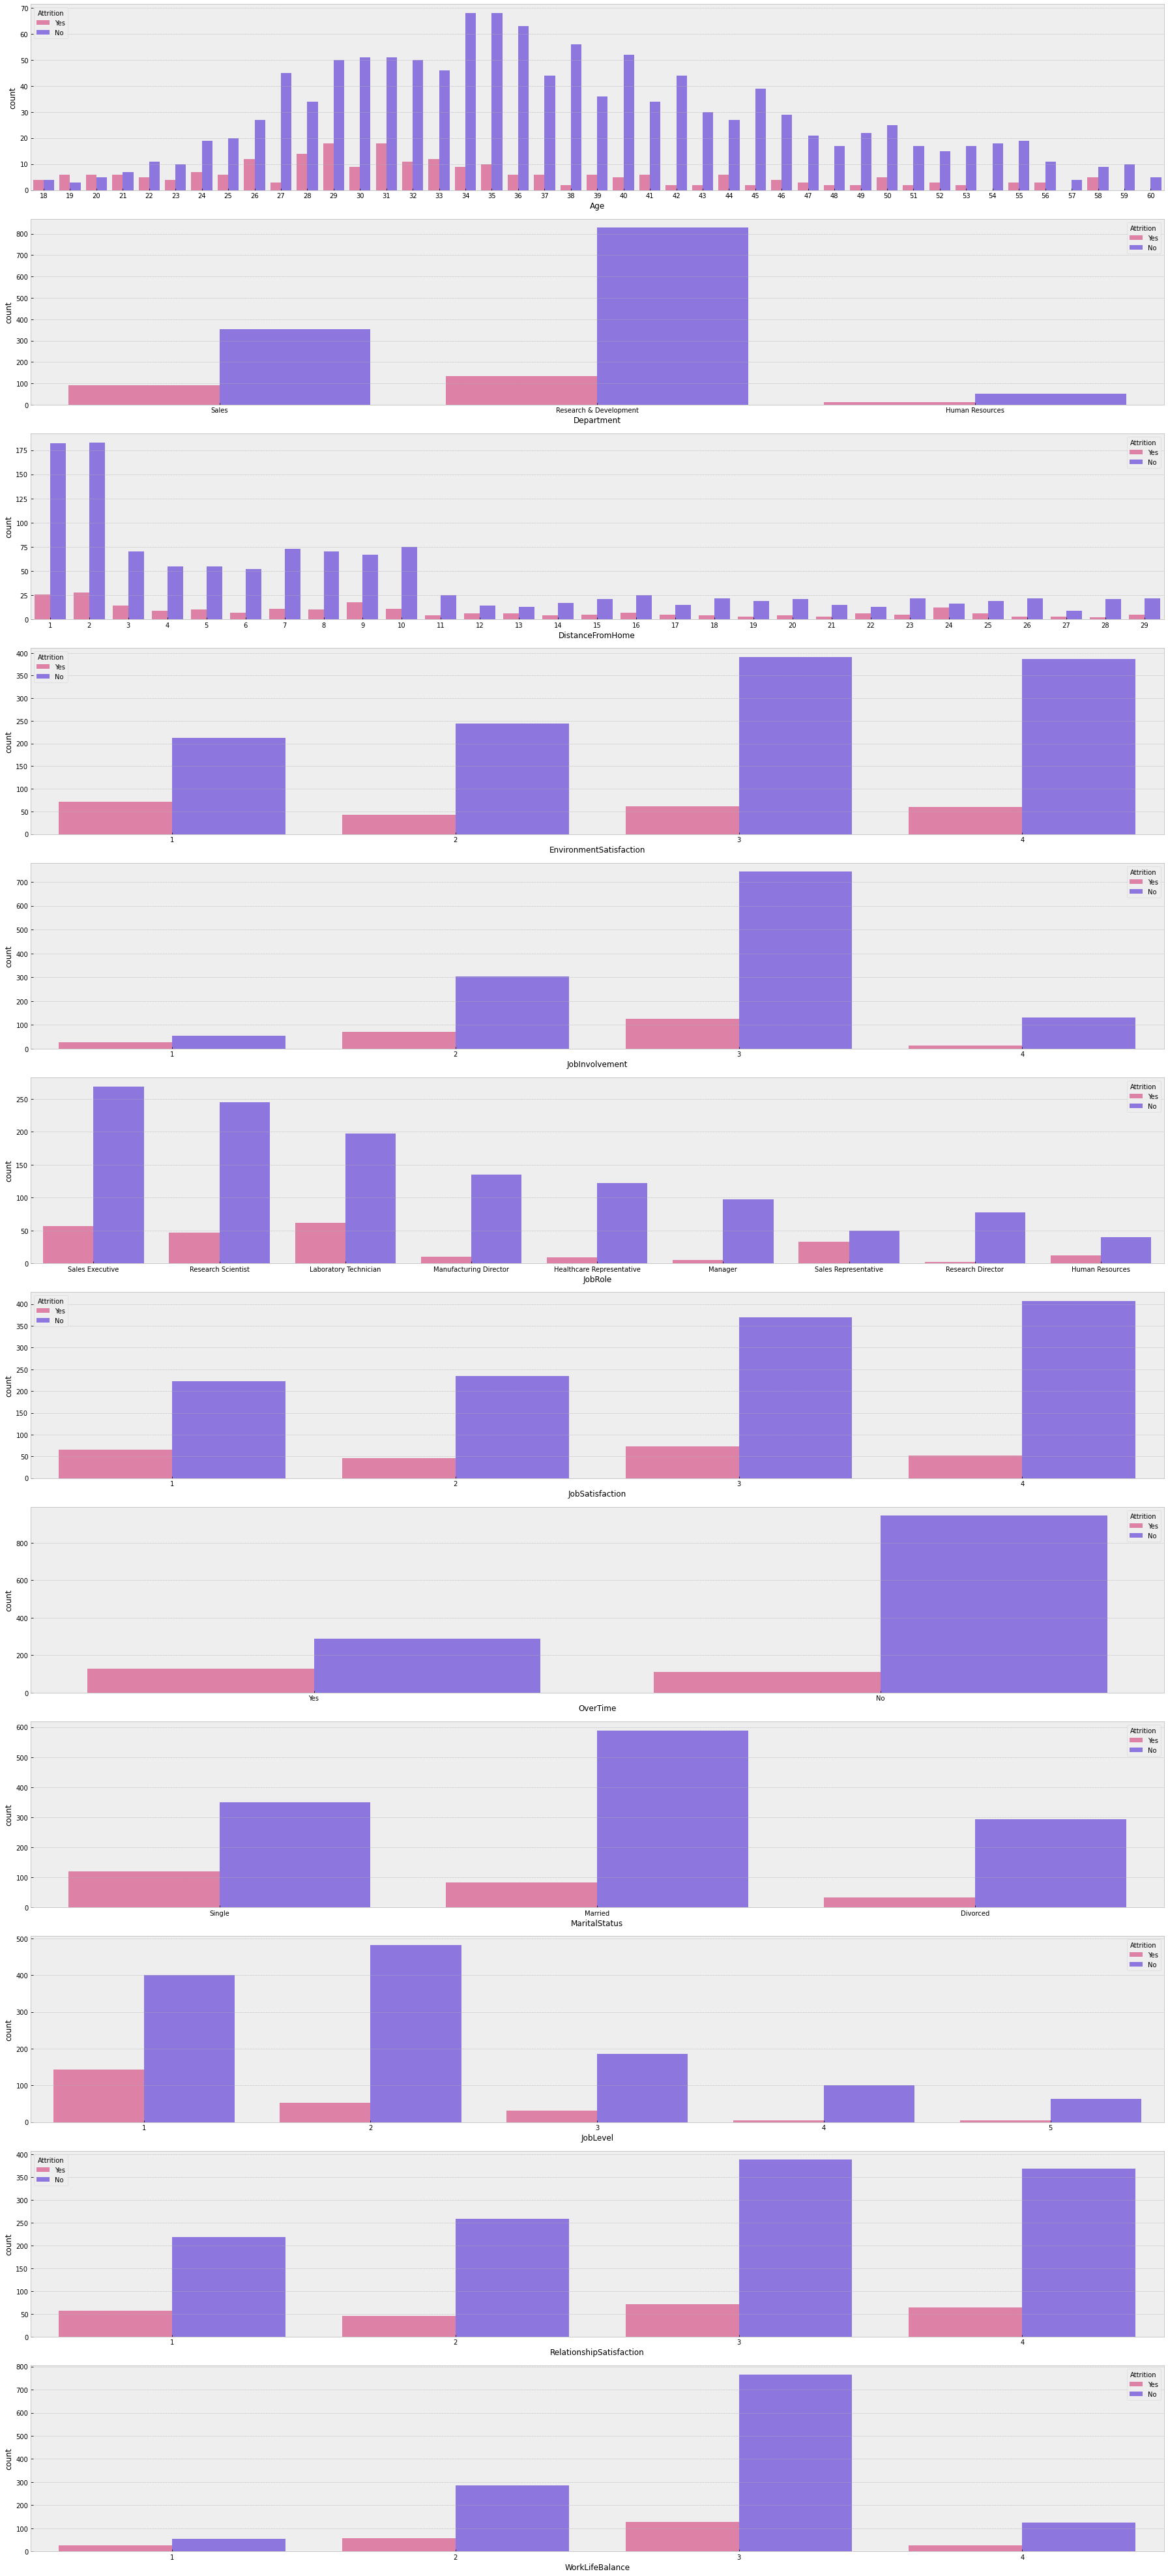

In [44]:
variables = ['Age', 'Department', 'DistanceFromHome','EnvironmentSatisfaction','JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'MaritalStatus', 'JobLevel', 'RelationshipSatisfaction','WorkLifeBalance']
#Quitaremos el sualdo mensual porque es una variable con bastantes datos parea realizar un gráfico de barras.
plt.figure(figsize=[25,55])
for i,col in enumerate(variables):
    axes = plt.subplot( 12,1,i + 1)
    sns.countplot(x=df_d[col], hue=df_d['Attrition'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

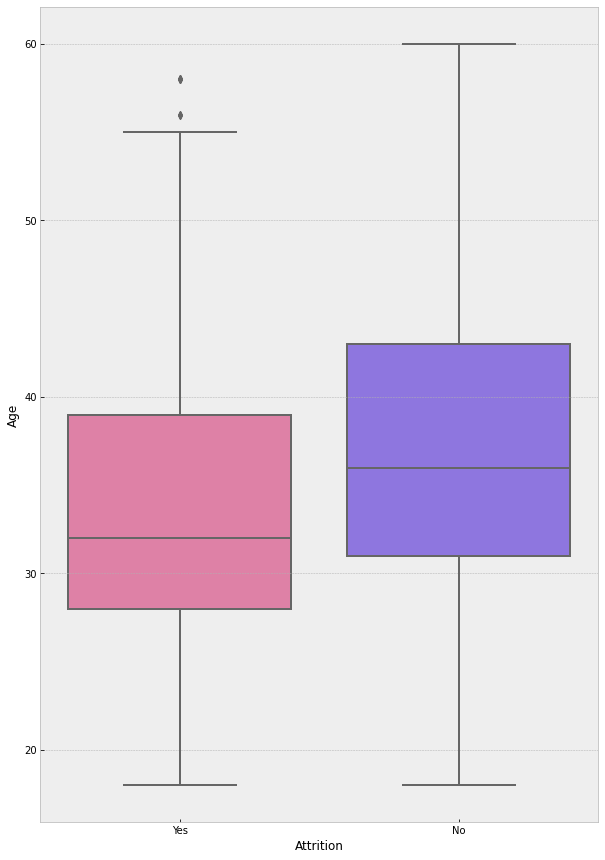

In [95]:
#Edad por estado de desgaste
plt.figure(figsize = [10,15])
sns.boxplot(x = df_d['Attrition'], y = df_d['Age'],palette=['#ED72A3','#8565F0'])

In [96]:
np.mean(abandono)

Age                            33.607595
DailyRate                     750.362869
DistanceFromHome               10.632911
Education                       2.839662
EnvironmentSatisfaction         2.464135
HourlyRate                     65.573840
JobInvolvement                  2.518987
JobLevel                        1.637131
JobSatisfaction                 2.468354
MonthlyIncome                4787.092827
MonthlyRate                 14559.308017
NumCompaniesWorked              2.940928
PercentSalaryHike              15.097046
PerformanceRating               3.156118
RelationshipSatisfaction        2.599156
StockOptionLevel                0.527426
TotalWorkingYears               8.244726
TrainingTimesLastYear           2.624473
WorkLifeBalance                 2.658228
YearsAtCompany                  5.130802
YearsInCurrentRole              2.902954
YearsSinceLastPromotion         1.945148
YearsWithCurrManager            2.852321
dtype: float64

In [97]:
np.mean(noabandono)

Age                            37.561233
DailyRate                     812.504461
DistanceFromHome                8.915653
Education                       2.927007
EnvironmentSatisfaction         2.771290
HourlyRate                     65.952149
JobInvolvement                  2.770479
JobLevel                        2.145985
JobSatisfaction                 2.778589
MonthlyIncome                6832.739659
MonthlyRate                 14265.779400
NumCompaniesWorked              2.645580
PercentSalaryHike              15.231144
PerformanceRating               3.153285
RelationshipSatisfaction        2.733982
StockOptionLevel                0.845093
TotalWorkingYears              11.862936
TrainingTimesLastYear           2.832928
WorkLifeBalance                 2.781022
YearsAtCompany                  7.369019
YearsInCurrentRole              4.484185
YearsSinceLastPromotion         2.234388
YearsWithCurrManager            4.367397
dtype: float64

Text(0.5, 0, 'MonthlyIncome')

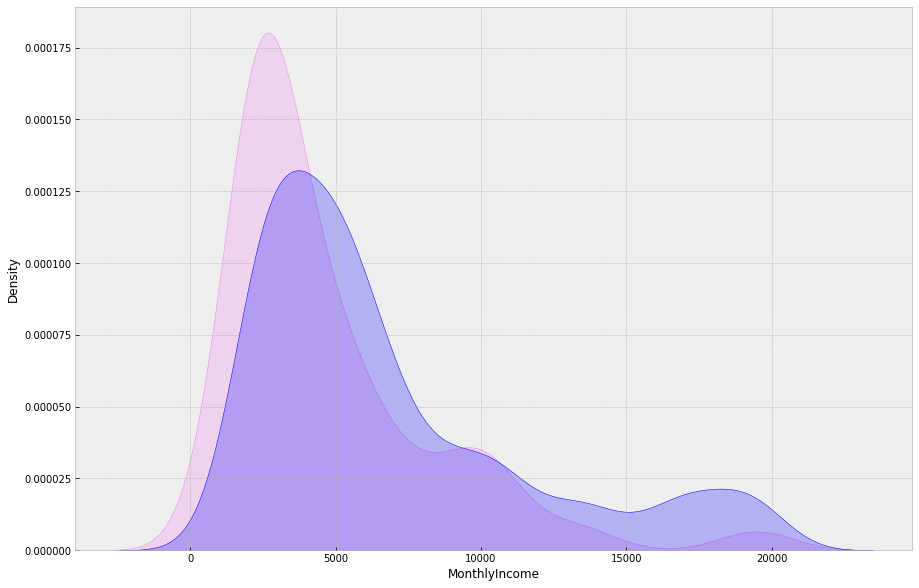

In [40]:
#Grafico de densidad de Kernel sobre salarios mensuales
plt.figure(figsize = [15,10])
sns.kdeplot(abandono['MonthlyIncome'], label = 'Dejo de laborar', shade = True, color = 'violet')
sns.kdeplot(noabandono['MonthlyIncome'], label = 'Continúa laborando', shade = True, color = 'b')

plt.xlabel('MonthlyIncome')

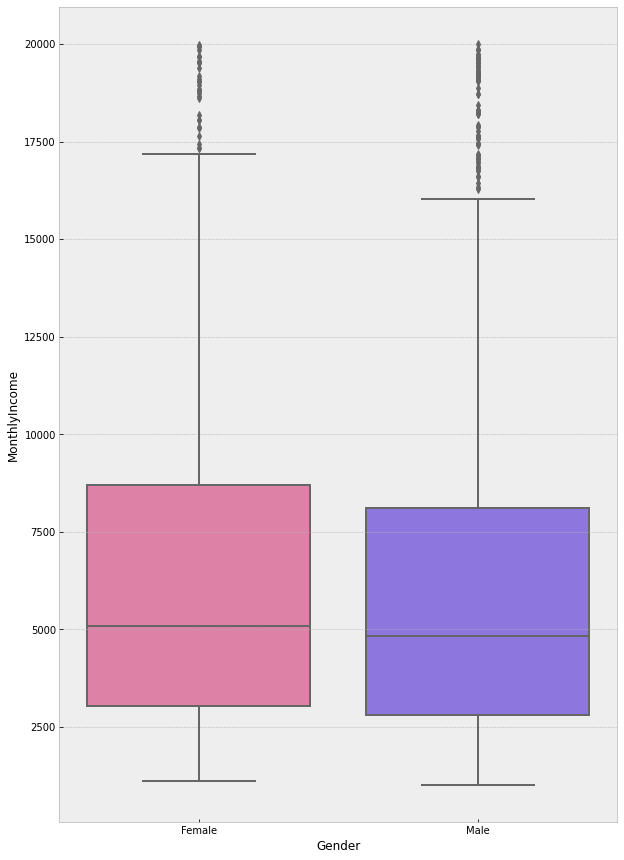

In [39]:
#Ingreso mensual por género
plt.figure(figsize = [10,15])
sns.boxplot(x = df_d['Gender'], y = df_d['MonthlyIncome'],palette=['#ED72A3','#8565F0'])

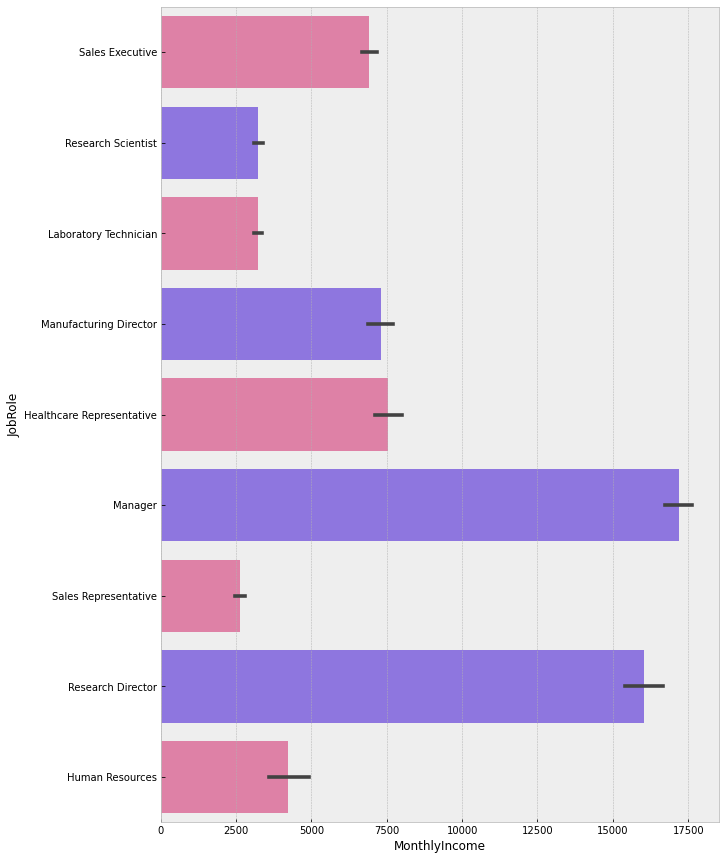

In [42]:
#Ingreso mensual por rol laboral
plt.figure(figsize = [10,15])
sns.barplot(x = df_d['MonthlyIncome'] , y = df_d['JobRole'],palette=['#ED72A3','#8565F0'])

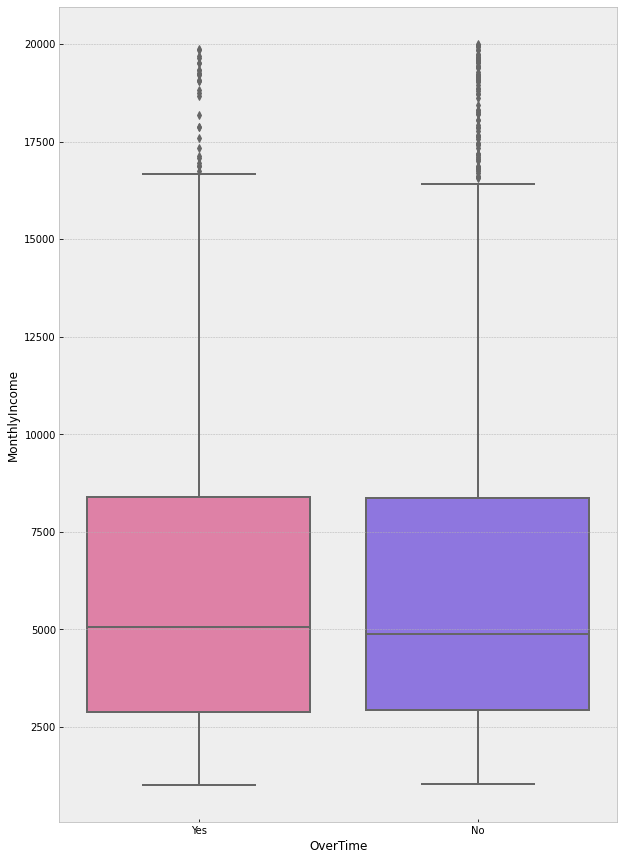

In [43]:
#Ingreso mensual pdependiendo si trabaja horas extra
plt.figure(figsize = [10,15])
sns.boxplot(x = df_d['OverTime'], y = df_d['MonthlyIncome'],palette=['#ED72A3','#8565F0'])

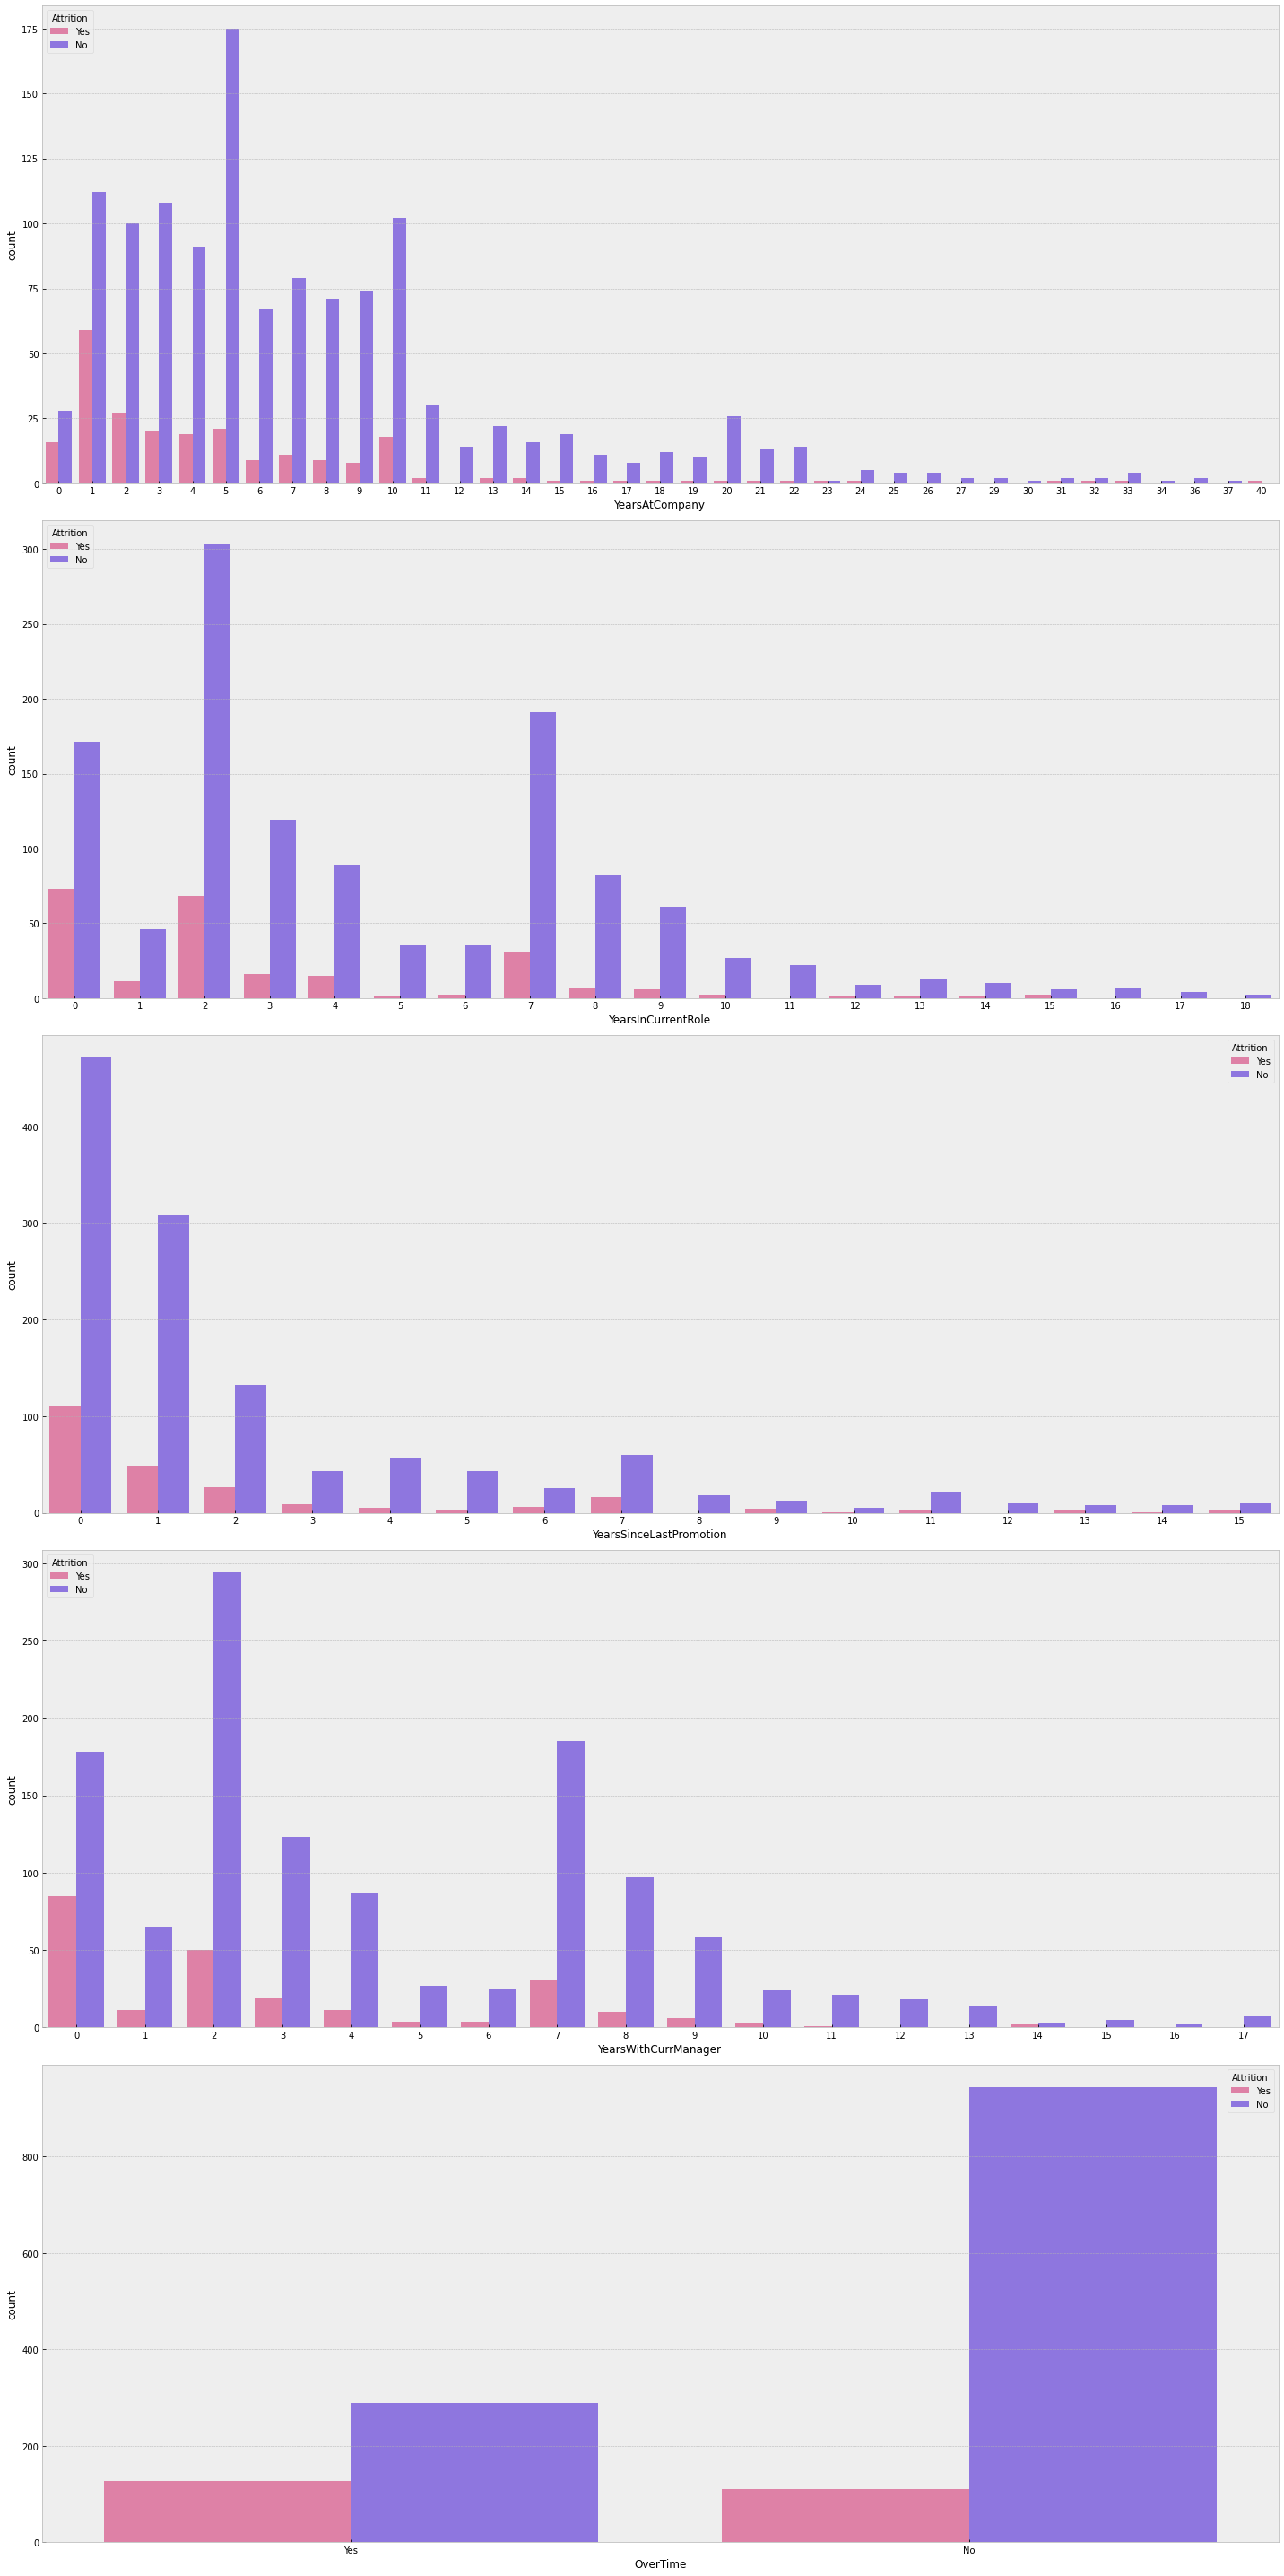

In [80]:
#Verifiquemos el estado de abandono en relación al tiempo.
variables2 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime']

plt.figure(figsize=[20,40])
for i,col in enumerate(variables2):
    axes = plt.subplot(5 ,1,i + 1)
    sns.countplot(x=df_d[col], hue=df_d['Attrition'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x7fb0d58ebac0>,
 [Text(-3.0295370707193667, 1.0304878151327763, 'No'),
  Text(3.029537046599057, -1.03048788604421, 'Yes')],
 [Text(-1.8934606691996039, 0.6440548844579852, '89.6%'),
  Text(1.8934606541244106, -0.6440549287776312, '10.4%')])

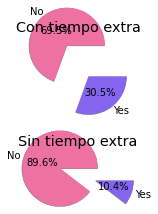

In [91]:
plt.subplot2grid((4,4), (1,1),colspan=1)
plt.title('Con tiempo extra')
labels = list(df.loc[df_d['OverTime']=='Yes'].groupby("Attrition")["EmployeeCount"].sum().keys())
plt.pie(x=df.loc[df_d['OverTime']=='Yes'].groupby("Attrition")["EmployeeCount"].sum(), 
        autopct="%.1f%%",  labels=labels, radius=2,pctdistance=0.5, explode=[1]*2, shadow=True, colors=['#ED72A3','#8565F0'])

plt.subplot2grid((4,4), (3,1),colspan=1)
plt.title('Sin tiempo extra')
labels = list(df.loc[df_d['OverTime']=='No'].groupby("Attrition")["EmployeeCount"].sum().keys())
plt.pie(x=df.loc[df_d['OverTime']=='No'].groupby("Attrition")["EmployeeCount"].sum(), 
        autopct="%.1f%%",  labels=labels, radius=2,pctdistance=0.5, explode=[1]*2, shadow=True,colors=['#ED72A3','#8565F0'])

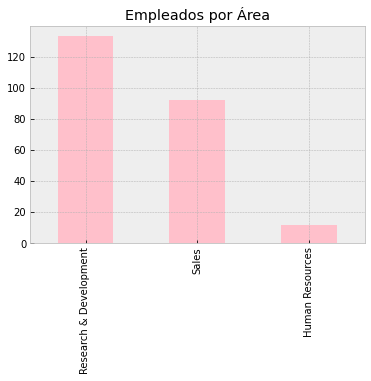

In [101]:

# Gráfico de barras de pasajeros del Titanic
plot = abandono['Department'].value_counts().plot(kind='bar',
                                            title='Empleados por Área',color = 'pink')

## Respondiendo a las hipótesis
1. La edad promedio de un empleado que abandona el puesto de trabajo es de 33 años por lo que en un rango de más menos 5 años, edad entre 28 y 39 años es alta probabilidad de dejar la empresa.

2. El salario de un empleado influye bastante entre los empleados que han dejado el puesto de trabajo al tener menos ingresos.

3. Entre más corto es el tiempo que han estado en la empresa, ya sea en el mismo puesto, sin promoción o promoción reciente de aumento o trabajando con el mismo manager , es más sencillo abandonar el puesto. Aquí es muy notorio que entre más tiempo duran en la empresa menos probable es que la dejen.

4. Research and Development es el departamento con mayor número de empleados en estado de abandono.

5. Al parecer, hay mayor estado de abandono cuando se tiene un nivel de satisfacciónen el trabajo bajo y alto. Esto puede deberse a las cargas de trabajo. 

6. Hay mayor probabilidad de abandonar el puesto de trabajo en los empleado solteros vs los casados o divorsiados. Puede pensarse que es referente al nivel de compromiso que tienen y la responsabilidad en casa.

7. El porcentaje de empleados que abandonan aumenta cuando dedican tiempo extra al trabajo, lo cual puede ser una variable interesante a considerar. 